## Project 1: Image Pre-processing 
## The goal of this project is to implement an application that allows to load an image and change apply the following transformations:
 Edge detection (Canny,Sobel, Prewitt)

 Change of contrast and brightness

 Convolution by specifying the weights of the window

 Binarization through the Otsu method

In [60]:
import cv2

In [61]:
import numpy as np
from matplotlib import pyplot as plt

# CANNY EDGE DETECTION

In [62]:

import numpy as np
from scipy.ndimage.filters import convolve, gaussian_filter
from scipy.misc import imread, imshow
 
def CannyEdgeDetector(im, blur = 1, highThreshold = 91, lowThreshold = 31):
	im = np.array(im, dtype=np.float32) #Convert to float to prevent clipping values
 
	#Gaussian blur to reduce noise
	im2 = gaussian_filter(im, blur)
 
	#Use sobel filters to get horizontal and vertical gradients
	im3h = convolve(im2,[[-1,0,1],[-2,0,2],[-1,0,1]]) 
	im3v = convolve(im2,[[1,2,1],[0,0,0],[-1,-2,-1]])
 
	#Get gradient and direction
	grad = np.power(np.power(im3h, 2.0) + np.power(im3v, 2.0), 0.5)
	theta = np.arctan2(im3v, im3h)
	thetaQ = (np.round(theta * (5.0 / np.pi)) + 5) % 5 #Quantize direction
 
	#Non-maximum suppression
	gradSup = grad.copy()
	for r in range(im.shape[0]):
		for c in range(im.shape[1]):
			#Suppress pixels at the image edge
			if r == 0 or r == im.shape[0]-1 or c == 0 or c == im.shape[1] - 1:
				gradSup[r, c] = 0
				continue
			tq = thetaQ[r, c] % 4
 
			if tq == 0: #0 is E-W (horizontal)
				if grad[r, c] <= grad[r, c-1] or grad[r, c] <= grad[r, c+1]:
					gradSup[r, c] = 0
			if tq == 1: #1 is NE-SW
				if grad[r, c] <= grad[r-1, c+1] or grad[r, c] <= grad[r+1, c-1]:
					gradSup[r, c] = 0
			if tq == 2: #2 is N-S (vertical)
				if grad[r, c] <= grad[r-1, c] or grad[r, c] <= grad[r+1, c]:
					gradSup[r, c] = 0
			if tq == 3: #3 is NW-SE
				if grad[r, c] <= grad[r-1, c-1] or grad[r, c] <= grad[r+1, c+1]:
					gradSup[r, c] = 0
 
	#Double threshold
	strongEdges = (gradSup > highThreshold)
 
	#Strong has value 2, weak has value 1
	thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gradSup > lowThreshold)
 
	#Tracing edges with hysteresis	
	#Find weak edge pixels near strong edge pixels
	finalEdges = strongEdges.copy()
	currentPixels = []
	for r in range(1, im.shape[0]-1):
		for c in range(1, im.shape[1]-1):	
			if thresholdedEdges[r, c] != 1:
				continue #Not a weak pixel
 
			#Get 3x3 patch	
			localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
			patchMax = localPatch.max()
			if patchMax == 2:
				currentPixels.append((r, c))
				finalEdges[r, c] = 1
 
	#Extend strong edges based on current pixels
	while len(currentPixels) > 0:
		newPix = []
		for r, c in currentPixels:
			for dr in range(-1, 2):
				for dc in range(-1, 2):
					if dr == 0 and dc == 0: continue
					r2 = r+dr
					c2 = c+dc
					if thresholdedEdges[r2, c2] == 1 and finalEdges[r2, c2] == 0:
						#Copy this weak pixel to final result
						newPix.append((r2, c2))
						finalEdges[r2, c2] = 1
		currentPixels = newPix
 
	return finalEdges

In [63]:
img = imread('/Users/ganesh/Downloads/Lenna.png',mode="L")
edges = CannyEdgeDetector(img)


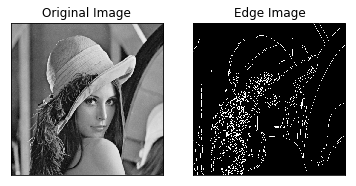

In [5]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# SOBEL EDGE DETECTION
1 Iterate over every pixel in the image

2 Apply the x gradient kernel

3 Apply the y gradient kernel

4 Find the length of the gradient using pythagoras' theorem

5 Normalise the gradient length to the range 0-255

6 Set the pixels to the new values

In [67]:
from PIL import Image
im = Image.open('/Users/ganesh/Downloads/Lenna.png').convert('L')
height, width = img.shape[:2]
mat = im.load()


sobelx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobely = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

sobelIm = Image.new('L', (width, height))
pixels = sobelIm.load()

linScale = .25

#For each pixel in the image
for row in range(width-len(sobelx)):
    for col in range(height-len(sobelx)):
        
        Gx = 0 
        Gy = 0
        
        for i in range(len(sobelx)):
            for j in range(len(sobely)):
                val = mat[row+i, col+j] * linScale
                Gx += sobelx[i][j] * val
                Gy += sobely[i][j] * val
                
        pixels[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))

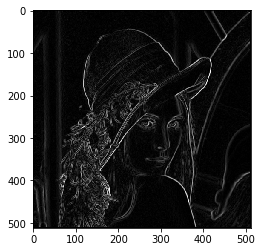

In [68]:
from matplotlib.pyplot import imshow
prewittIm.save('leena_Sobel.png')

%matplotlib inline
pil_im = Image.open('leena_Sobel.png', 'r')
imshow(np.asarray(pil_im),cmap = 'gray')

# PREWITT EDGE DETECTION

In [71]:
from PIL import Image
im = Image.open('/Users/ganesh/Downloads/Lenna.png').convert('L')
height, width = img.shape[:2]
mat = im.load()
prewittx = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]   
prewitty = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
prewittIm = Image.new('L', (width, height))
pixels = prewittIm.load()

linScale = .3

        #For each pixel in the image
for row in range(width-len(prewittx)):
    for col in range(height-len(prewittx)):
        Gx = 0
        Gy = 0
        
        for i in range(len(prewittx)):
            for j in range(len(prewitty)):
                
                val = mat[row+i, col+j] * linScale
                Gx += prewittx[i][j] * val
                Gy += prewitty[i][j] * val
        pixels[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))


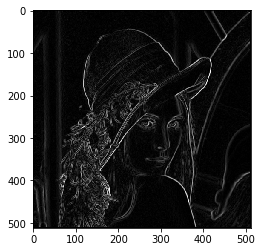

In [72]:
from matplotlib.pyplot import imshow
prewittIm.save('leena_Prewitt.png')

%matplotlib inline
pil_im = Image.open('leena_Prewitt.png', 'r')
imshow(np.asarray(pil_im),cmap='gray')

## Prewitt using inbuilt function in python.

In [8]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(img,(3,3),0)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

In [9]:
#cv2.imshow("Prewitt X", img_prewittx)
#cv2.imshow("Prewitt Y", img_prewitty)
#cv2.imshow("Prewitt", img_prewittx + img_prewitty)
#plt.show()


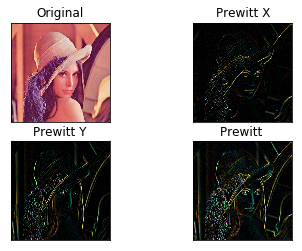

In [10]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_prewittx,cmap = 'gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(img_prewitty,cmap = 'gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(img_prewittx + img_prewitty,cmap = 'gray')
plt.title('Prewitt '), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
from PIL import Image
#change_contrast(Image.open('/Users/ganesh/Downloads/Lenna.png'), 100)

In [14]:
def change_contrast(img, level):
    
    img = Image.open("/Users/ganesh/Downloads/Lenna.png")
    img.load()

    factor = (259 * (level+255)) / (255 * (259-level))
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            color = img.getpixel((x, y))
            new_color = tuple(int(factor * (c-128) + 128) for c in color)
            img.putpixel((x, y), new_color)

    return img

## Contrast change


done


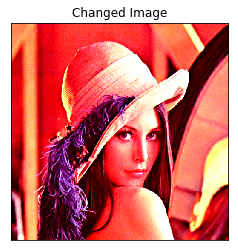

In [15]:
result = change_contrast('/Users/ganesh/Downloads/Lenna.png', 100)
result.save('/Users/ganesh/Desktop/test_image1_output.jpg')
print('done')
plt.subplot(1,1,1),plt.imshow(result,cmap = 'gray')
plt.title('Changed Contrast Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Brightness Change

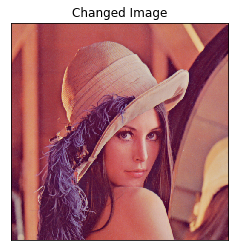

In [16]:
# open an image file (.jpg or.png) you have in the working folder
im1 = Image.open("/Users/ganesh/Downloads/Lenna.png")
# multiply each pixel by 0.9 (makes the image darker)

im2 = im1.point(lambda p: p * 0.9)

plt.subplot(1,1,1),plt.imshow(im2,cmap = 'gray')
plt.title('Changed Image'), plt.xticks([]), plt.yticks([])
plt.show()


## Convolution of image

In [17]:
##Convolution of image

#kernel = np.array([[-1, -1, -1],
#                   [-1,  8, -1],
#                   [-1, -1, -1]])
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


In [18]:
from skimage import io,color
img = io.imread('/Users/ganesh/Downloads/Lenna.png')    # Load the image
img = color.rgb2gray(img)  

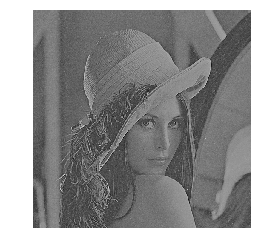

In [19]:
# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img,kernel)
#print '\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255
# Plot the filtered image
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## Otsu binarization

input_shape = (512, 512)
max_t = 117
[[ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]


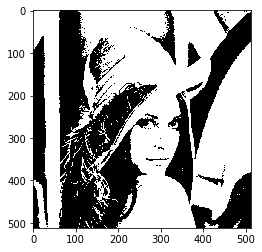

In [50]:

#otsu method
import numpy as np
import pylab as plt
from PIL import Image
from matplotlib.image import imread


img=Image.open('/Users/ganesh/Downloads/Lenna.png')
gray=img.convert('L')
gray.save('Leena_gray.png')


img=imread('Leena_gray.png')
img=np.array(img)
input_shape = img.shape
print("input_shape =", input_shape)	
img=img.flatten()*255
plt.hist(img, bins=256, range=(0, 255))
plt.savefig('okkah_histgram.png')

histgram = np.zeros(256)
for i in img:
	histgram[int(i)] += 1


max_t = max_val = 0

for t in range(0, 256):
	w1 = w2 = 0			
	sum1 = sum2 = 0		
	m1 = m2 = 0.0		
	for i in range(0, t):
		w1 += histgram[i]
		sum1 += i*histgram[i]
	for j in range(t, 256):
		w2 += histgram[j]
		sum2 += j*histgram[j]
	if w1 == 0 or w2 == 0:	
		continue
	m1 = sum1/w1		
	m2 = sum2/w2
	result = w1*w2*(m1-m2)*(m1-m2)	
	if max_val < result:
		max_val = result
		max_t = t
print ("max_t =", max_t)			


output = np.copy(img)
output[output < max_t] = 0
output[output >= max_t] = 255


output = output.reshape(input_shape)
print(output)

plt.clf()
plt.imshow(output, cmap='gray')
plt.show()